# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_banco = pd.read_csv('previsao_de_renda.csv')
df_banco.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


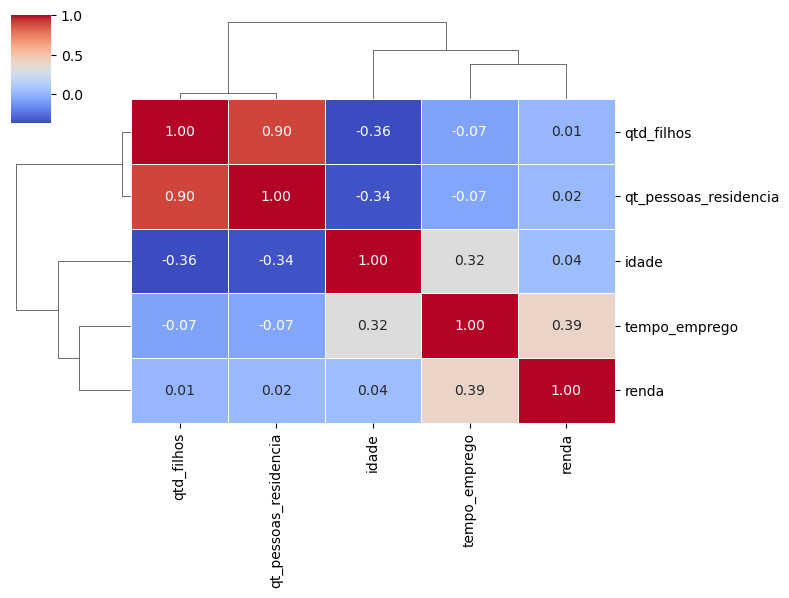

In [3]:
df_banco_1 = df_banco.loc[:,['qtd_filhos', 'idade','tempo_emprego', 'qt_pessoas_residencia', 'renda']]
correlacao_matriz = df_banco_1 = df_banco_1.corr()

sns.clustermap(correlacao_matriz, 
               cmap="coolwarm",      
               annot=True,           
               fmt=".2f",            
               linewidths=0.5,       
               figsize=(8, 6))       

plt.show()

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

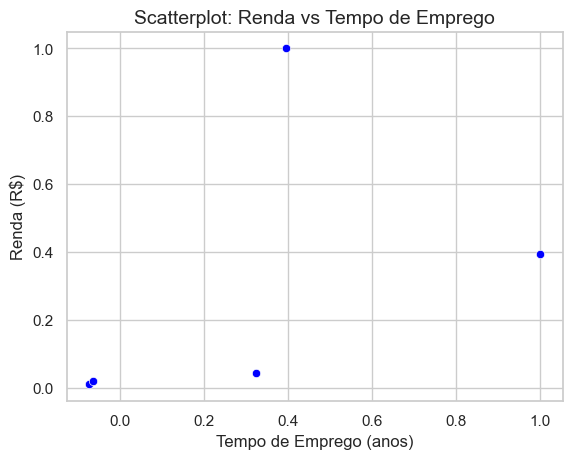

In [4]:
sns.set(style="whitegrid")
sns.scatterplot(data=df_banco_1, x='tempo_emprego', y='renda', color='blue')
plt.title('Scatterplot: Renda vs Tempo de Emprego', fontsize=14)
plt.xlabel('Tempo de Emprego (anos)', fontsize=12)
plt.ylabel('Renda (R$)', fontsize=12)
plt.show()

3) Na su aopinião, há outliers na variável renda?

Sim, a maioria dos pontos estão fazendo uma curva acendente, porem 1 ponto está fora dessa curva, o que pode ser alguém com renda muito alta ou baixa para o tempo de emprego.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

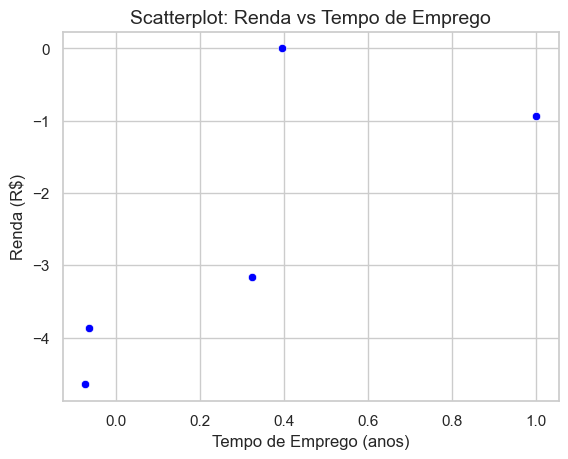

In [12]:
df_banco_log = df_banco_1.copy()
df_banco_log['log_renda'] = np.log(df_banco_1['renda'])
correlacao_matriz = df_banco_log['log_renda'].corr(df_banco_1['tempo_emprego'])

sns.set(style="whitegrid")
sns.scatterplot(data=df_banco_log, x='tempo_emprego', y='log_renda', color='blue')
plt.title('Scatterplot: Renda vs Tempo de Emprego', fontsize=14)
plt.xlabel('Tempo de Emprego (anos)', fontsize=12)
plt.ylabel('Renda (R$)', fontsize=12)
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
O ponto isolado continua mas os outros foram deslocados, mostrando que esse ponto não é um outliner. 